# Cloning GitHub Repository and installing libraries

In [1]:
!git clone https://github.com/Wazzabeee/wavegan-pytorch
    
import os

os.chdir('wavegan-pytorch')

!pip3  install -r requirements.txt
!pip3 install datasets

Cloning into 'wavegan-pytorch'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 88 (delta 29), reused 28 (delta 28), pack-reused 56
Unpacking objects: 100% (88/88), 2.13 MiB | 6.85 MiB/s, done.


---
# Parameters used

In [2]:
%%writefile params.py
import torch
import random
import numpy as np
import logging
import os

#############################
# DataSet Path
#############################s
target_signals_dir = '/kaggle/input/obamaaduiods-split/WAVS/'
#############################
# Model Params
#############################
model_prefix = 'test' # name of the model to be saved
n_iterations = 50000
lr_g = 1e-4
lr_d = 3e-4 # you can use with discriminator having a larger learning rate than generator instead of using n_critic updates ttur https://arxiv.org/abs/1706.08500
beta1 = 0.5
beta2 = 0.9
use_batchnorm=False
validate=True
decay_lr = False # used to linearly deay learning rate untill reaching 0 at iteration 100,000
generator_batch_size_factor = 1 # in some cases we might try to update the generator with double batch size used in the discriminator https://arxiv.org/abs/1706.08500
n_critic = 1 # update generator every n_critic steps if lr_g = lr_d the n_critic's default value is 5 
# gradient penalty regularization factor.
p_coeff = 10
batch_size = 10
noise_latent_dim = 100  # size of the sampling noise
model_capacity_size = 32    # model capacity during training can be reduced to 32 for larger window length of 2 seconds and 4 seconds
# rate of storing validation and costs params
store_cost_every = 300
progress_bar_step_iter_size = 400
#############################
# Backup Params
#############################
take_backup = True
backup_every_n_iters = 5000
save_samples_every = 5000
output_dir = 'output'
if not(os.path.isdir(output_dir)):
    os.makedirs(output_dir)
#############################
# Audio Reading Params
#############################
window_length = 65536 #[16384, 32768, 65536] in case of a longer window change model_capacity_size to 32
sampling_rate = 16000
normalize_audio = True 
num_channels = 1

#############################
# Logger init
#############################
LOGGER = logging.getLogger('wavegan')
LOGGER.setLevel(logging.DEBUG)
#############################
# Torch Init and seed setting
#############################
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
# update the seed
manual_seed = 2019 
random.seed(manual_seed)
torch.manual_seed(manual_seed)
np.random.seed(manual_seed)
if cuda:
    torch.cuda.manual_seed(manual_seed)
    torch.cuda.empty_cache()

Overwriting params.py


---
# Imports

In [3]:
import IPython
from IPython.display import Image
import shutil

---
# Training

In [4]:
!python3  train.py

100%|█| 125/125 [3:50:01<00:00, 110.41s/it, Loss_D WD=3.2158801555633545, Loss_G


---
# Training and Validation loss

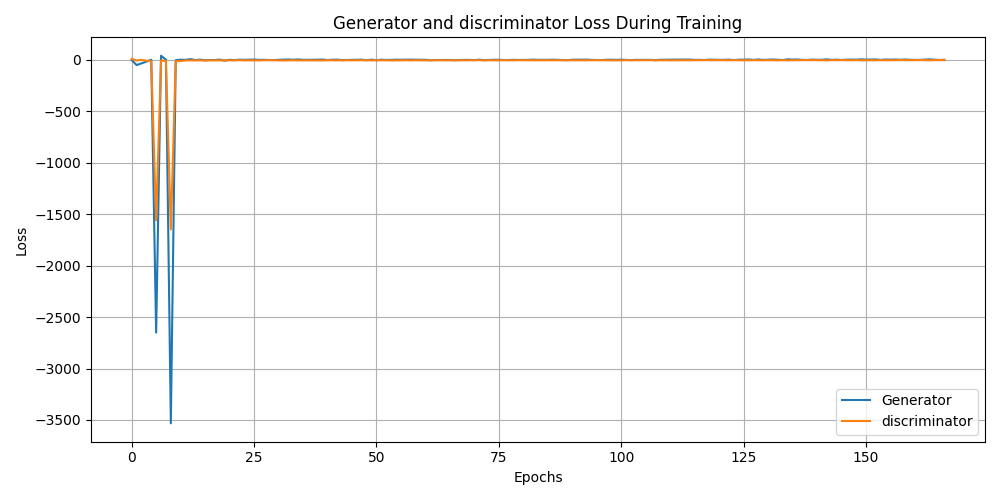

In [5]:
Image('/kaggle/working/wavegan-pytorch/visualization/loss.png')

---
# Subdirectories with sample WAV files

In [6]:
os.listdir('/kaggle/working/wavegan-pytorch/output')

['35000',
 '0',
 '20000',
 '30000',
 '40000',
 '15000',
 '45000',
 '5000',
 '10000',
 '25000']

## Generator's output at 5 000 iterations

In [7]:
IPython.display.Audio('/kaggle/working/wavegan-pytorch/output/' + '0' + '/1.wav')

## Generator's output at 10 000 iterations

In [8]:
IPython.display.Audio('/kaggle/working/wavegan-pytorch/output/' + '5000' + '/1.wav')

## Generator's output at 15 000 iterations

In [9]:
IPython.display.Audio('/kaggle/working/wavegan-pytorch/output/' + '10000' + '/1.wav')

## Generator's output at 20 000 iterations

In [10]:
IPython.display.Audio('/kaggle/working/wavegan-pytorch/output/' + '15000' + '/1.wav')

## Generator's output at 25 000 iterations

In [11]:
IPython.display.Audio('/kaggle/working/wavegan-pytorch/output/' + '20000' + '/1.wav')

## Generator's output at 30 000 iterations

In [12]:
IPython.display.Audio('/kaggle/working/wavegan-pytorch/output/' + '25000' + '/1.wav')

## Generator's output at 35 000 iterations

In [13]:
IPython.display.Audio('/kaggle/working/wavegan-pytorch/output/' + '30000' + '/1.wav')

## Generator's output at 40 000 iterations

In [14]:
IPython.display.Audio('/kaggle/working/wavegan-pytorch/output/' + '35000' + '/1.wav')

## Generator's output at 45 000 iterations

In [15]:
IPython.display.Audio('/kaggle/working/wavegan-pytorch/output/' + '40000' + '/1.wav')

## Generator's output at 50 000 iterations

In [16]:
IPython.display.Audio('/kaggle/working/wavegan-pytorch/output/' + '45000' + '/1.wav')

In [15]:
from resemblyzer import VoiceEncoder, preprocess_wav
import numpy as np
import torch

def load_and_preprocess(audio_path):
    wav = preprocess_wav(audio_path)
    return wav

def get_speaker_embedding(audio_path):
    encoder = VoiceEncoder()
    wav = load_and_preprocess(audio_path)
    embedding = encoder.embed_utterance(wav)
    return embedding

# Paths to your audio files
ref_audio_path = '/kaggle/input/obamaaduiods-split/WAVS/train/1.wav'
synth_audio_path = '/kaggle/input/obamawavegan45000/download'

ref_embedding = get_speaker_embedding(ref_audio_path)
synth_embedding = get_speaker_embedding(synth_audio_path)

# Calculate cosine similarity
cosine_similarity = np.dot(ref_embedding, synth_embedding) / (np.linalg.norm(ref_embedding) * np.linalg.norm(synth_embedding))
print(f"Cosine Similarity: {cosine_similarity}")


Loaded the voice encoder model on cuda in 0.02 seconds.
Loaded the voice encoder model on cuda in 0.03 seconds.
Cosine Similarity: 0.6518027782440186


---
# Saving samples and images to zip

In [17]:
shutil.make_archive('50k_iter', 'zip', '/kaggle/working/wavegan-pytorch/output/')
shutil.make_archive('graph', 'zip', '/kaggle/working/wavegan-pytorch/visualization/')

'/kaggle/working/wavegan-pytorch/graph.zip'

In [11]:
!pip install resemblyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 70.7 MB/s eta 0:00:00:00:010:01
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp310-cp310-linux_x86_64.whl size=27295 sha256=35ec29e475b07377b467e72379108e79678087dced85a7515a2a56cfc0ac3707
  Stored in directory: /root/.cache/pip/wheels/2a/2b/84/ac7bacfe8c68a87c1ee3dd3c66818a54c71599abf308e8eb35
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26304 sha256=20669c9c1560bf67ce1d52d7640cd57ec23ca31c7e6f3a1f9db634f0485aa78f
  Stored in directory: /root/.cache/pip/wheels/7c/d0/9e/1f26ebb66d9e1732e4098bc5a6c2d91f6c9a529838f0284890
Successfully built webrtcvad typing
